<a href="https://colab.research.google.com/github/chongzicbo/Dive-into-Deep-Learning-tf.keras/blob/master/9.3.%20%E7%9B%AE%E6%A0%87%E6%A3%80%E6%B5%8B%E5%92%8C%E8%BE%B9%E7%95%8C%E6%A1%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##9.3. 目标检测和边界框
在前面的一些章节中，我们介绍了诸多用于图像分类的模型。在图像分类任务中，我们假设图像里只有一个主体目标，并关注如何识别该目标的类别。然而，很多时候图像里有多个我们感兴趣的目标，我们不仅想知道他们的类别，还想得到它们在图像中的具体位置。在计算机视觉里，我们将这类任务称为目标检测(object detection)或物体检测。\

目标检测在多个领域中被广泛使用。例如，在无人驾驶里，我们需要通过识别拍摄到的视频图像里的车辆、行人、道路和障碍的位置来规划行进线路。机器人也常通过该任务来检测感兴趣的目标。安防领域则需要检测异常目标，如歹徒或者炸弹。\
在接下来的几节里，我们将介绍目标检测里的多个深度学习模型。在此之前，让我们来了解下目标位置这个概念。先导入实验所需的模块。

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from IPython import display

In [0]:
def use_svg_display():
  #用矢量图显示
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  #设置图的尺寸
  plt.rcParams['figure.figsize']=figsize

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


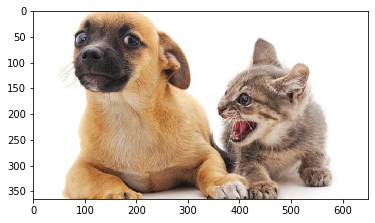

In [11]:
catdog_path="/content/drive/My Drive/data/d2l-zh-tensoflow/img/catdog.jpg"
img_arr=image.img_to_array(image.load_img(path=catdog_path))
plt.imshow(img_arr/255.0)

###9.3.1. 边界框
在目标检测里，我们通常使用边界框（bounding box）来描述目标位置。边界框是一个矩形框，可以由矩形左上角的 $x$ 和 $y$ 轴坐标与右下角的 $x$ 和 $y$ 轴坐标确定。我们根据上面的图的坐标信息来定义图中狗和猫的边界框。图中的坐标原点在图像的左上角，原点往右和往下分别为 $x$ 轴和 $y$ 轴的正方向。

In [0]:
dog_bbox,cat_bbox=[60,5,345,516],[350,90,590,493]

我们可以在图中将边界框画出来，以检查其是否准确。画之前，我们定义一个辅助函数bbox_to_rect。它将边界框表示成matplotlib的边界框格式。

In [0]:
def bbox_to_rect(bbox,color):
  # 将边界框(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib格式：
  # ((左上x, 左上y), 宽, 高)
  return plt.Rectangle(xy=(bbox[0],bbox[1]),width=bbox[2]-bbox[0],height=bbox[3]-bbox[1],fill=False,edgecolor=color,linewidth=2)

我们将边界框加载在图像上，可以看到目标的主要轮廓基本在框内。

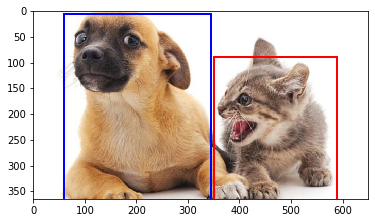

In [26]:
fig=plt.imshow(img_arr/255.0)
fig.axes.add_patch(bbox_to_rect(dog_bbox,'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox,'red'))

###9.3.2. 小结
* 在目标检测里不仅需要找出图像里面所有感兴趣的目标，而且要知道它们的位置。位置一般由矩形边界框来表示。